In [28]:
import pandas as pd
import scipy.stats as stats

In [53]:
exp_file = 'experiment_data_2_wks.csv'
df_exp = pd.read_csv(exp_file)

In [54]:
df_exp['treatment_date'] = pd.to_datetime(df_exp['treatment_date'])
df_exp['signup_date'] = pd.to_datetime(df_exp['signup_date'])

In [55]:
df_exp['delta_t'] = df_exp['signup_date']-df_exp['treatment_date']

In [56]:
df_exp.head()

,treatment_date,test,is_signed_up,signup_date,delta_t
0,2016-04-01,0,0,NaT,NaT
1,2016-04-01,0,0,NaT,NaT
2,2016-04-01,0,0,NaT,NaT
3,2016-04-01,0,0,NaT,NaT
4,2016-04-01,0,0,NaT,NaT


In [57]:
# How large is each group?
test_subj = df_exp.test.value_counts()
print(test_subj[0], 'control subjects, ', test_subj[1], 'test subjects')
sign_ups = df_exp.is_signed_up.value_counts()
print(sign_ups[0], 'not signed up, ', sign_ups[1], 'sign ups')


30241 control subjects,  3372 test subjects
28703 not signed up,  4910 sign ups


In [58]:
# What is the sign up rate of test and control?
control = df_exp[(df_exp.test == 0) & (df_exp.is_signed_up)]
print(len(control), 'sign ups from the ', test_subj[0], 'control subjects: ', len(control)/test_subj[0])

test = df_exp[(df_exp.test == 1) & (df_exp.is_signed_up)]
print(len(test), 'sign ups from the ', test_subj[1], 'test subjects: ', len(test)/test_subj[1])



4448 sign ups from the  30241 control subjects:  0.147085083165
462 sign ups from the  3372 test subjects:  0.137010676157


In [59]:
# Is the experiment already significant?
tval,pval=stats.ttest_ind(df_exp[df_exp.test == 1].is_signed_up, 
                          df_exp[df_exp.test == 0].is_signed_up,
                          equal_var=False)

tval,pval

(-1.6085876233862411, 0.10778154054220876)

In [60]:
# The test signup rate seems lower than the old message. 
# Can you see any reason why?

In [61]:
df_exp.columns

Index(['treatment_date', 'test', 'is_signed_up', 'signup_date', 'delta_t'], dtype='object')

In [84]:
test.delta_t.value_counts()/len(test)

3 days     0.181818
4 days     0.151515
2 days     0.149351
6 days     0.108225
1 days     0.097403
5 days     0.097403
7 days     0.086580
9 days     0.032468
8 days     0.030303
10 days    0.025974
0 days     0.021645
11 days    0.010823
12 days    0.004329
13 days    0.002165
Name: delta_t, dtype: float64

In [85]:
control.delta_t.value_counts()/len(control)

2 days     0.224820
1 days     0.198291
3 days     0.176259
4 days     0.142086
5 days     0.088354
6 days     0.059128
7 days     0.034622
0 days     0.031025
8 days     0.022257
9 days     0.012365
10 days    0.006745
11 days    0.002248
12 days    0.001574
13 days    0.000225
Name: delta_t, dtype: float64

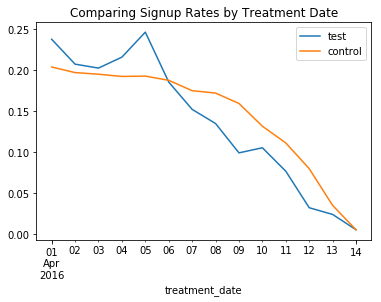

In [78]:
import matplotlib.pyplot as plt
# this represents the number of people per treatment day who ended up signing up

fig = df_exp[df_exp.test==1][
    ['treatment_date', 'is_signed_up']].groupby('treatment_date').mean().plot()
df_exp[df_exp.test==0][
    ['treatment_date', 'is_signed_up']].groupby('treatment_date').mean().plot(ax=fig)
plt.legend(['test','control'])
plt.title('Comparing Signup Rates by Treatment Date')

Looking at the above plot and the time between email and sign-up, it seems that people are signing up more slowly after receiving the test email.  Given that the time between email and sign-up appears to be longer for the test subjects, the testing window may need to be extended another week to get a better sense of the cumulative effect of each strategy. 

In [88]:
PATH = 'https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/1.4.11_experimentation_guided_example/experiment_data_final.csv'
df_exp2 = pd.read_csv(PATH)

In [97]:
df_exp2['treatment_date'] = pd.to_datetime(df_exp2['treatment_date'])
df_exp2['signup_date'] = pd.to_datetime(df_exp2['signup_date'])

df_exp2['delta_t'] = df_exp2['signup_date']-df_exp2['treatment_date']

In [98]:
# How large is each group?
test_subj = df_exp2.test.value_counts()
print(test_subj[0], 'control subjects, ', test_subj[1], 'test subjects')
sign_ups = df_exp2.is_signed_up.value_counts()
print(sign_ups[0], 'not signed up, ', sign_ups[1], 'sign ups')


# What is the sign up rate of test and control?
control = df_exp2[(df_exp2.test == 0) & (df_exp2.is_signed_up)]
print(len(control), 'sign ups from the ', test_subj[0], 'control subjects: ', len(control)/test_subj[0])

test = df_exp2[(df_exp2.test == 1) & (df_exp2.is_signed_up)]
print(len(test), 'sign ups from the ', test_subj[1], 'test subjects: ', len(test)/test_subj[1])


tval,pval=stats.ttest_ind(df_exp2[df_exp2.test == 1].is_signed_up, 
                          df_exp2[df_exp2.test == 0].is_signed_up,
                          equal_var=False)

tval,pval

46867 control subjects,  19861 test subjects
52575 not signed up,  14153 sign ups
9344 sign ups from the  46867 control subjects:  0.19937269294
4809 sign ups from the  19861 test subjects:  0.242132823121


(12.024441836968931, 3.0722075714128591e-33)

(0, 0.3)

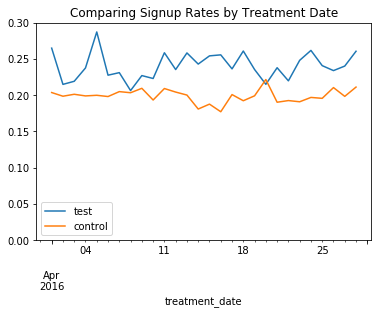

In [99]:
fig = df_exp2[df_exp2.test==1][
    ['treatment_date', 'is_signed_up']].groupby('treatment_date').mean().plot()
df_exp2[df_exp2.test==0][
    ['treatment_date', 'is_signed_up']].groupby('treatment_date').mean().plot(ax=fig)
plt.legend(['test','control'])
plt.title('Comparing Signup Rates by Treatment Date')

plt.ylim([0, .3])

Sure enough, once the window was extended, the longer sign-up window of the test set compensated for the lower rate seen when the testing period was small. Put another way, more people seem to end up signing up when they see the test email, but on average it takes them longer to act. 

In [100]:
test.delta_t.value_counts()/len(test)

3 days     0.127885
4 days     0.120191
5 days     0.116864
2 days     0.102932
6 days     0.098981
7 days     0.080266
8 days     0.060719
1 days     0.056769
9 days     0.054897
10 days    0.042628
11 days    0.034311
12 days    0.027033
14 days    0.016012
13 days    0.014140
15 days    0.013100
0 days     0.008110
16 days    0.007694
18 days    0.004783
17 days    0.003951
19 days    0.003327
20 days    0.001871
24 days    0.000832
21 days    0.000624
22 days    0.000624
26 days    0.000416
38 days    0.000208
23 days    0.000208
25 days    0.000208
27 days    0.000208
30 days    0.000208
Name: delta_t, dtype: float64

In [101]:
control.delta_t.value_counts()/len(test)

2 days     0.362861
3 days     0.311291
1 days     0.295904
4 days     0.264504
5 days     0.192348
6 days     0.143897
7 days     0.102724
8 days     0.076939
9 days     0.053857
0 days     0.044292
10 days    0.033479
11 days    0.017883
12 days    0.014556
13 days    0.010397
14 days    0.005407
15 days    0.004783
16 days    0.002495
17 days    0.001871
18 days    0.001040
19 days    0.000624
20 days    0.000624
23 days    0.000624
21 days    0.000416
22 days    0.000208
Name: delta_t, dtype: float64